# Sparse Dictionary Learning Tests

In this notebook we will be preforming tests to show the abilities of our sparse dictionary learning algorithm.

In [44]:
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time

%run Classes.py

### Evaluation Criteria

We will be using MSE and the Stochastic Partial Image Reconstruction to estimate error.

## Task 1: Image Compression/Reconstruction

This task is to take a single image, compress it (patch by patch) with sparse coding, and then reconstruct it. We will do this in two different ways: One way is by training our dictionary on a group of sample images, the other is by training using only the single test image. The purpose of the second method is to get a "best case" scenario of our algorithms preformance.


***Method A: Same Image Training***
Here we will train our dictionary on a single image, the same image that we will be testing on. The purpose of this is to get a "best case" scenario of our algorithms preformance.

***Method B: Multiple Image Training***
Here we will train our dictionary on a group of images, and then test it on an unseen test image.


In [6]:
learner = DictionaryLearner()

In [19]:
img = cv2.imread('Original Images/cheese_board.jpg')
img.shape[:2] / np.array([20,20])

array([153.6, 204. ])

In [10]:
# Load the image
img = cv2.imread('dinner.jpg', cv2.IMREAD_COLOR)

# Resize the image to 400x300 pixels
img_resized = cv2.resize(img, (200, 150), interpolation=cv2.INTER_AREA)

# Convert the resized image to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Save the grayscale image as 'small_gray_dinner.png'
cv2.imwrite('small_gray_dinner.png', img_gray )

array([[[ 51,  50,  52],
        [ 52,  51,  53],
        [ 55,  54,  56],
        ...,
        [ 22,  28,  39],
        [ 20,  26,  37],
        [ 18,  24,  35]],

       [[ 57,  56,  58],
        [ 58,  57,  59],
        [ 59,  58,  60],
        ...,
        [ 18,  24,  35],
        [ 18,  24,  35],
        [ 19,  25,  36]],

       [[ 56,  55,  57],
        [ 56,  55,  57],
        [ 57,  56,  58],
        ...,
        [ 19,  25,  36],
        [ 20,  26,  37],
        [ 20,  26,  37]],

       ...,

       [[ 96, 108, 118],
        [103, 115, 125],
        [103, 115, 125],
        ...,
        [112, 110, 122],
        [111, 110, 120],
        [111, 110, 120]],

       [[ 93, 105, 115],
        [104, 116, 126],
        [105, 117, 127],
        ...,
        [112, 110, 122],
        [113, 109, 120],
        [114, 110, 121]],

       [[ 90, 102, 112],
        [104, 116, 126],
        [107, 119, 129],
        ...,
        [111, 109, 121],
        [113, 109, 120],
        [114, 110, 121]]

In [20]:
paths = ['cheese_board.jpg', 'chicken_n_beans.jpg', 'octopus.jpg', 'tea_eggs.jpg', 'persimmon_tomato_salad.jpg']

In [32]:
paths = ['Compressed Images/cheese_board.jpg']
new_path = 'Reconstructed Images/cheese_boardL'
N = 512
K = 256
I = 10
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

In [35]:

with open('Graphs/cheese_board_dictionaries.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)


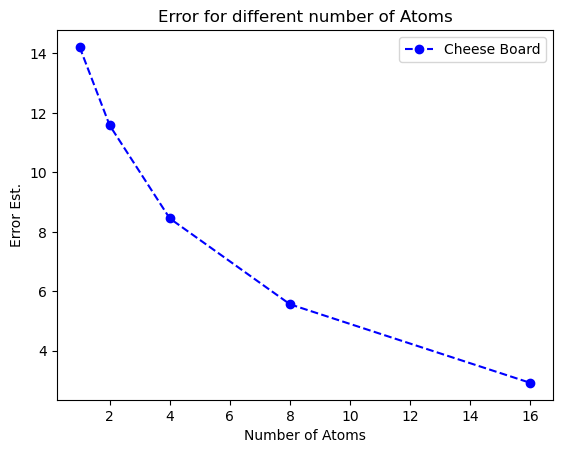

In [36]:
xs = Ls
ys = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()


In [37]:
paths = ['Compressed Images/chicken_n_beans.jpg']
new_path = 'Reconstructed Images/chicken_n_beansL'
N = 256
K = 128
I = 1
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [5,10,20] # Depends on what I see, but probably [2, 8, 10, 16]? [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

with open('Graphs/chicken_n_beans.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

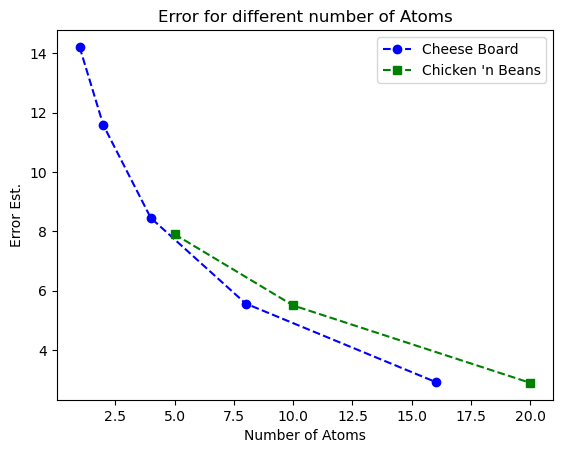

In [38]:
xs2 = Ls
ys2 = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.plot(xs2, ys2, linestyle='--', marker='s', color='green', label = "Chicken 'n Beans")
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()

In [41]:
paths = ['Compressed Images/persimmon_tomato_salad.jpg']
new_path = 'Reconstructed Images/persimmon_tomato_saladL'
N = 512
K = 256
I = 5
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [5,10,16] # Depends on what I see, but probably [2, 8, 10, 16]? [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

with open('Graphs/persimmon_tomato_salad.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

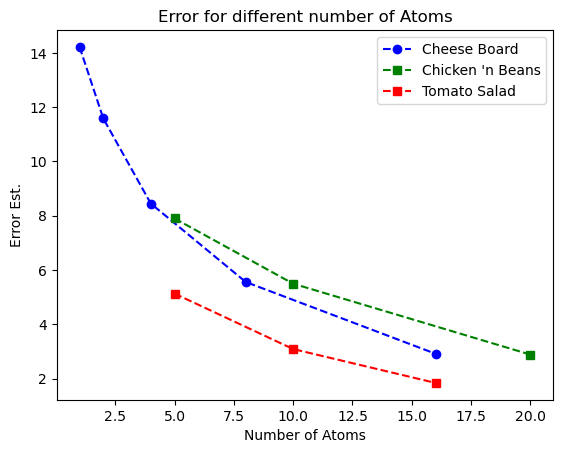

In [42]:
xs3 = Ls
ys3 = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.plot(xs2, ys2, linestyle='--', marker='s', color='green', label = "Chicken 'n Beans")
plt.plot(xs3, ys3, linestyle='--', marker='s', color='red', label = "Tomato Salad")
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()

### Results


#### Cheese Board
As a reminder, the parameters for this one were: N = 512, K = 256, I = 10

| L = 1, Error = 14.21                                                                          | L = 2, Error = 8.45                                                                           | L = 4, Error = 11.58                                                                          |
|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| <img alt="Caption 1" height="300" src="Reconstructed Images/cheese_boardL1.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL2.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL4.jpg" width="400"/> |

| L = 8, Error = 5.56                                                                           | L = 16, Error = 2.92                                                                           | Original                                                                                 |
|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| <img alt="Caption 1" height="300" src="Reconstructed Images/cheese_boardL8.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL16.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Compressed Images/cheese_board.jpg" width="400"/> |

#### Chicken 'n Beans
The parameters for this one were: N = 256, K = 128, I = 1

| L = 5, Error = 7.90                                                                              | L = 10, Error = 5.49                                                                              | L = 20, Error = 2.89                                                                              |Original                                                                                 |
|--------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|----|
| <img alt="Caption 1" height="300" src="Reconstructed Images/chicken_n_beansL5.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/chicken_n_beansL10.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/chicken_n_beansL20.jpg" width="400"/> |<img alt="Caption 2" height="300" src="Compressed Images/chicken_n_beans.jpg" width="400"/> |

#### Tomato Salad
The parameters for this one were: N = 512, K = 256, I = 5

| L = 5, Error =                                                                                          | L = 10, Error =                                                                                      | L = 16, Error =                                                                                          |Original                                                                                 |
|---------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|----|
| <img alt="Caption 1" height="300" src="Reconstructed Images/persimmon_tomato_saladL5.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/persimmon_tomato_saladL10.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/persimmon_tomato_saladL16.jpg" width="400"/> |<img alt="Caption 2" height="300" src="Compressed Images/persimmon_tomato_salad.jpg" width="400"/> |

### Method B

Unseen data

In [46]:
paths = ['Compressed Images/cheese_board.jpg', 'Compressed Images/chicken_n_beans.jpg', 'Compressed Images/persimmon_tomato_salad.jpg', 'Compressed Images/tea_eggs.jpg']
new_path = 'Reconstructed Images/octopus'
path = 'Compressed Images/octopus.jpg'

K = 128
I = 10
percent= .2
min_count = 1
patch_shape = np.array([8,8])

#Ns = [186, 256, 512, 1042]
Ns = [512, 1842]
octopus_errors = {}
for N in Ns:
    octopus_errors[N] = []
    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

    dictionaries = []
    #Ls = [1, 2, 4, 8, 16]
    Ls = [2,4,8]
    for L in Ls:
        learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
        D = learner.sparse_dictionary_learning(iters = I, output = True)
        (recon, error) =  learner.SPIR(path = path, percent=percent, min_count=min_count)
        dictionaries.append((L, N, D, error))
        correct_path = new_path + 'N' + str(N) + 'L' + str(L) + '.jpg'
        cv2.imwrite(correct_path, recon)

        octopus_errors[N].append(error)

    with open('Graphs/octopusN' + str(N) + '.pkl', 'wb') as f:
        pickle.dump(dictionaries, f)



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

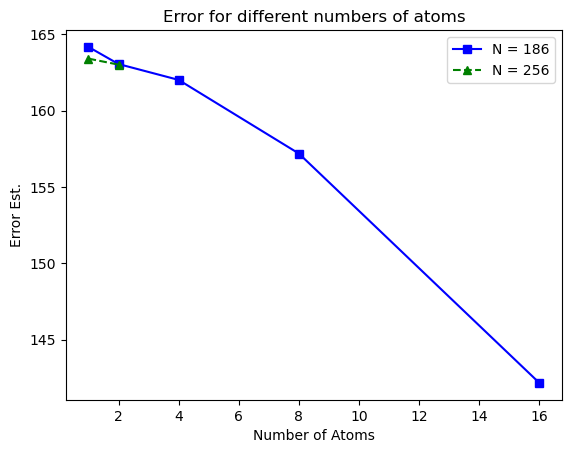

In [72]:
xs186 = [1,2,4,8,16]
ys186 = octopus_errors[186]
xs256 = [1,2]
ys256 = octopus_errors[256]
xs512 = [2,4,8]
ys512 = octopus_errors[512]
xs1842 = [2,4,8]
ys1842 = octopus_errors[1842]

plt.plot(xs186, ys186, linestyle='-', marker='s', color='blue', label = 'N = 186')
plt.plot(xs256, ys256, linestyle='--', marker='^', color='green', label = 'N = 256')
#plt.plot(xs512, ys512, linestyle=':', marker='d', color='red', label = 'N = 512')
#plt.plot(xs1842, ys1842, linestyle='-.', marker='o', color='purple', label = 'N = 1842')

plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different numbers of atoms')
plt.legend()
plt.savefig('Graphs/Octopus_Error_Est_small_N.png')
plt.show()


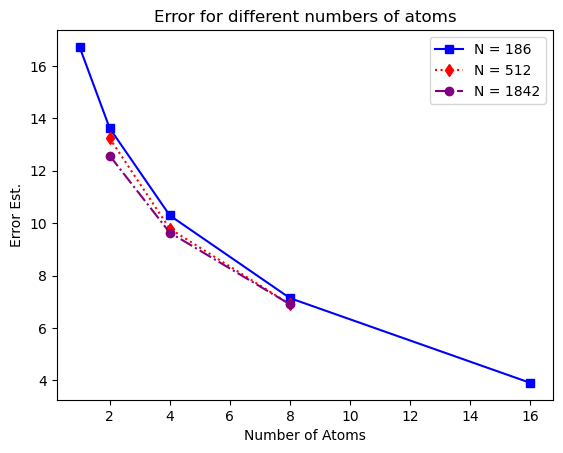

In [86]:
xs186 = [1,2,4,8,16]
#ys186 = octopus_errors[186]
xs256 = [1,2]
ys256 = octopus_errors[256]
xs512 = [2,4,8]
ys512 = octopus_errors[512]
xs1842 = [2,4,8]
ys1842 = octopus_errors[1842]

plt.plot(xs186, ys186, linestyle='-', marker='s', color='blue', label = 'N = 186')
#plt.plot(xs256, ys256, linestyle='--', marker='^', color='green', label = 'N = 256')
plt.plot(xs512, ys512, linestyle=':', marker='d', color='red', label = 'N = 512')
plt.plot(xs1842, ys1842, linestyle='-.', marker='o', color='purple', label = 'N = 1842')

plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different numbers of atoms')
plt.legend()
plt.savefig('Graphs/Octopus_Error_Est.png')
plt.show()

### Results

<img alt="Caption 1" height="600" src="Graphs/Octopus_Error_Est.png" width="800"/>

We can see the clear preformance difference between these two types of tasks.


In [63]:
octopus_errors

{512: [13.242186606184813, 9.789715176606133, 6.906319955139147],
 1842: [12.576150723750777, 9.640872379578324, 6.903842410450008],
 186: [164.16533440544174,
  163.04435253017567,
  162.0065687403697,
  157.18729682359347,
  142.1749915411592],
 256: [163.3992867001085, 163.00598316958377]}

In [77]:
L = 2
img_orig = load_image('Compressed Images/octopus.jpg')
img_orig_flat = img_orig.copy().flatten()
#octopus_errors[N] = []
for N in [186, 256, 512, 1842]:
    img = load_image('Reconstructed Images/octopusN' + str(N) + 'L' + str(L) +'.jpg')
    img_flat = img.flatten()
    temp_indices = np.where(img_flat>0)[0]
    M = len(temp_indices)

    error = np.linalg.norm(img_orig_flat[temp_indices] - img_flat[temp_indices])/np.sqrt(M)
    #octopus_errors[N].append(error)
    print(error)


163.04435253017567
163.00598316958377
161.69835487765874
161.80806974879397


In [80]:
M

29913

In [51]:
    temp_recon = recon_img.copy().flatten()
temp_count = count.copy().flatten()
temp_img = img.copy().flatten()
temp_indices = np.where(temp_count>min_count)[0]
M = len(temp_indices)
error = np.linalg.norm(temp_img[temp_indices] -  (temp_recon[temp_indices]/temp_count[temp_indices]))/np.sqrt(M)

recon_img = recon_img // count
recon_img = np.clip(recon_img, 0, 255).astype(np.uint8)

array([[ 64,  63,  61, ...,  54,  56,  49],
       [ 54,  57,  59, ...,  44,  46,  59],
       [ 51,  57,  63, ..., 130, 122,  99],
       ...,
       [ 15,  15,  15, ...,  81,  83,  82],
       [ 14,  14,  13, ...,  85,  85,  88],
       [ 14,  13,  12, ...,  85,  84,  89]], dtype=uint8)

In [81]:
with open('Graphs/octopusN186.pkl', 'rb') as f:
    x = pickle.load(f)
ys186 = [error for L, N, D, error in x]


[(1,
  186,
  array([[-3.18506563e-02, -1.27343998e-01,  1.85000000e+02, ...,
           3.00000000e+01,  8.55218349e-02, -1.29176059e-01],
         [-4.30920878e-02, -1.27770510e-01,  1.87000000e+02, ...,
           4.40000000e+01,  8.53436910e-02, -1.39900575e-01],
         [-6.97904379e-02, -1.28144119e-01,  1.94000000e+02, ...,
           7.00000000e+01,  8.78572005e-02, -1.38904281e-01],
         ...,
         [-1.79465140e-01, -1.21024486e-01,  8.80000000e+01, ...,
           1.74000000e+02,  1.22651725e-01, -1.09193237e-01],
         [-1.87236146e-01, -1.20723804e-01,  9.70000000e+01, ...,
           1.75000000e+02,  1.23680926e-01, -1.12395724e-01],
         [-1.86512259e-01, -1.20732782e-01,  5.80000000e+01, ...,
           1.73000000e+02,  1.30885334e-01, -1.10705526e-01]]),
  16.723953500952994),
 (2,
  186,
  array([[ 2.00164427e-01,  1.40000000e+02, -1.36580751e-01, ...,
           2.20000000e+01, -1.24615965e-01,  1.91658247e-01],
         [ 9.39372588e-02,  1.20000000e+0

In [84]:
ys186 = [error for L, N, D, error in x]

In [93]:
stuff = {}

In [45]:
attempt = 7

paths = ['Compressed Images/cheese_board.jpg', 'Compressed Images/chicken_n_beans.jpg', 'Compressed Images/persimmon_tomato_salad.jpg', 'Compressed Images/octopus.jpg', 'Compressed Images/burger.jpg', 'Compressed Images/granita.jpg', 'Compressed Images/milanese.jpg', 'Compressed Images/pizzelle.jpg', 'Compressed Images/pork_knuckle.jpg', 'Compressed Images/tea_eggs.jpg']
new_path = 'Reconstructed Images/easter_egg_bread'
path = 'Compressed Images/easter_egg_bread.jpg'

N = 1000
K = 100
I = 10
L = 4
P=8

percent= .1
min_count = 1
patch_shape = np.array([8,8])


test_number = 1
Total_tests = 10
def test_process(K = 100, L = 4):
    print(f"Test Number {test_number}/{Total_tests}, K = {K}, L = {L}")

    patch_shape = np.array([P, P])

    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)
    sam.add_filter("noise", std = 10)

    print("Learning Dictionary")
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    learner.sparse_dictionary_learning(iters = I, output = False)

    print("Reconstructing Image")
    correct_path = new_path + 'K' + str(K) +  'L' + str(L) + '.jpg'
    (recon, error) =  learner.SPIR(path = path, percent=percent, apply_filter = True, recon_image_path = correct_path )






In [46]:
Ls = [1,2,4,8,16]
Ks = [64, 128, 256, 512]
order = [(1,64),(2,64),(1,128),(2,128),(4,64),(4,128),(4,256),(1,512),(2,512),(4,512),(8,512),(16,512)]
lis = [(i,j) for i in range(5) for j in range(4)]
lis.sort(key = lambda x:x[0] + x[1])
params = [(Ls[i], Ks[j]) for (i,j) in lis ]

In [47]:
I = 10
N = 1000
test_number = 1
Total_tests = 20
for (L,K) in params:
    test_process(K=K, L=L)
    test_number += 1

Test Number 1/20, K = 64, L = 1
Learning Dictionary


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 2/20, K = 128, L = 1
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 3/20, K = 64, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 4/20, K = 256, L = 1
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 5/20, K = 128, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 6/20, K = 64, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 7/20, K = 512, L = 1
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 8/20, K = 256, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 9/20, K = 128, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 10/20, K = 64, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 11/20, K = 512, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 12/20, K = 256, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 13/20, K = 128, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 14/20, K = 64, L = 16
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 15/20, K = 512, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 16/20, K = 256, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 17/20, K = 128, L = 16
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 18/20, K = 512, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 19/20, K = 256, L = 16
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 20/20, K = 512, L = 16
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


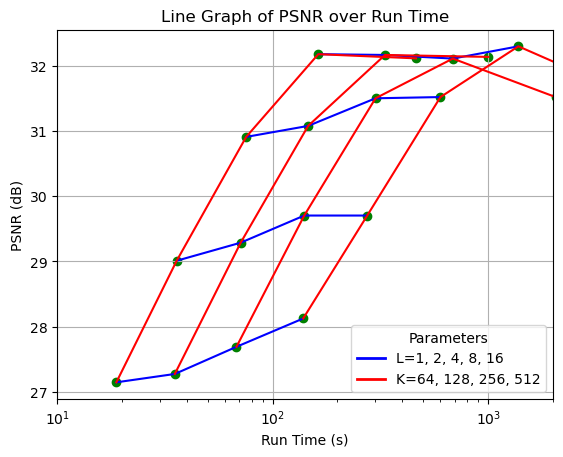

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

error_metric = 'PSNR'

df_metrics = pd.read_csv('EVALUATION_METRICS.csv')
df_temp = df_metrics.loc[17:36, ['Run Time', error_metric, 'param: K', 'param: L']]
#df_temp = df_metrics[df_metrics['Partial or Full'] == 0.1][['Run Time', error_metric, 'param: K', 'param: L']]

fig, ax = plt.subplots()


# plot the lines
for L in [1, 2, 4, 8]:
    df_temp_temp = df_temp[df_temp['param: L'] == L]
    ax.plot(df_temp_temp['Run Time'], df_temp_temp[error_metric],  color='blue',  linestyle='-')

for K in [64, 128, 256, 512]:
    df_temp_temp = df_temp[df_temp['param: K'] == K]
    ax.plot(df_temp_temp['Run Time'], df_temp_temp[error_metric],  color='red',  linestyle='-')

plt.xlabel('Run Time (s)')
plt.ylabel(error_metric + ' (dB)')
plt.title(f'Line Graph of {error_metric} over Run Time')
plt.legend(title = 'Parameters', handles=[Line2D([0], [0], color='blue', lw=2, label='L=1, 2, 4, 8, 16'),Line2D([0], [0], color='red', lw=2, label='K=64, 128, 256, 512')], loc='lower right')
# plot the scatter plot with green dots
ax.scatter(df_temp['Run Time'], df_temp[error_metric], color='green')


# set x and y axis range
ax.set_xlim(10, 2000)
#ax.set_ylim(0, 50)

# set x and y axis to log scale
ax.set_xscale('log')
#ax.set_yscale('log')

plt.grid(True)

plt.savefig(f'Graphs/{error_metric} vs Run Time for various parameters.jpg')
plt.show()


In [106]:

Ls = [1,2,4,8]
Ks = [9, 16, 32]
lis = [(i,j) for i in range(4) for j in range(3)]
lis.sort(key = lambda x:x[0] + x[1])
params = [(Ls[i], Ks[j]) for (i,j) in lis ]

I = 10
N = 1000
percent = .1
test_number = 1
Total_tests = 12
for (L,K) in params:
    test_process(K=K, L=L)
    test_number += 1

Test Number 1/12, K = 9, L = 1
Learning Dictionary


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 2/12, K = 16, L = 1
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 3/12, K = 9, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 4/12, K = 32, L = 1
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 5/12, K = 16, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 6/12, K = 9, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 7/12, K = 32, L = 2
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 8/12, K = 16, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 9/12, K = 9, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 10/12, K = 32, L = 4
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 11/12, K = 16, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

Test Number 12/12, K = 32, L = 8
Learning Dictionary


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


In [109]:
df_metrics = pd.read_csv('EVALUATION_METRICS.csv')
df_metrics.loc[41:52, ['Run Time', error_metric, 'param: K', 'param: L']]

,Run Time,PSNR,param: K,param: L
41,4.382606,26.079033,9.0,1.0
42,6.190296,26.247512,16.0,1.0
43,7.101282,27.406568,9.0,2.0
44,11.294364,26.655311,32.0,1.0
45,11.806125,28.145150,16.0,2.0
46,10.766869,28.989651,9.0,4.0
47,20.322208,28.711057,32.0,2.0
48,18.784527,29.608358,16.0,4.0
49,16.321398,29.882897,9.0,8.0
50,38.498975,30.232894,32.0,4.0


 len = 32, correct_rows = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
 7 values for L = 1
 7 values for L = 2
 7 values for L = 4
 7 values for L = 8
 4 values for L = 16


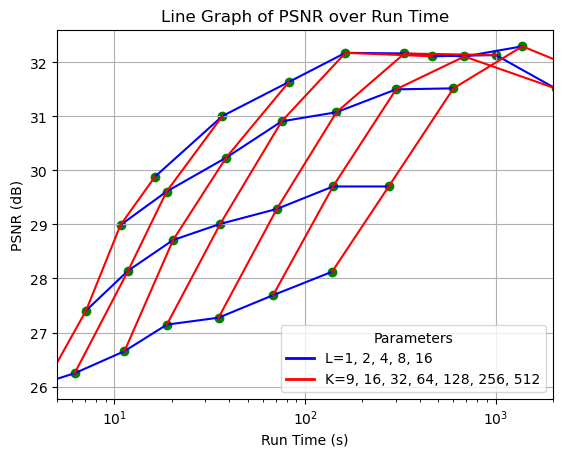

In [138]:
error_metric = 'PSNR'

df_metrics = pd.read_csv('EVALUATION_METRICS.csv')
correct_rows = list(range(17, 37)) + list(range(41, 53))
print(f' len = {len(correct_rows)}, correct_rows = {correct_rows}')
df_temp = df_metrics.loc[correct_rows, ['Run Time', error_metric, 'param: K', 'param: L']]
#df_temp = df_metrics[df_metrics['Partial or Full'] == 0.1][['Run Time', error_metric, 'param: K', 'param: L']]

fig, ax = plt.subplots()

# plot the lines
for L in [1, 2, 4, 8, 16]:
    df_temp_temp = df_temp[df_temp['param: L'] == L].sort_values('Run Time')
    print(f' {len(df_temp_temp)} values for L = {L}')
    ax.plot(df_temp_temp['Run Time'], df_temp_temp[error_metric], color='blue', linestyle='-')

for K in [9, 16, 32, 64, 128, 256, 512]:
    df_temp_temp = df_temp[df_temp['param: K'] == K].sort_values('Run Time')
    ax.plot(df_temp_temp['Run Time'], df_temp_temp[error_metric], color='red', linestyle='-')

plt.xlabel('Run Time (s)')
plt.ylabel(error_metric + ' (dB)')
plt.title(f'Line Graph of {error_metric} over Run Time')
plt.legend(title='Parameters', handles=[Line2D([0], [0], color='blue', lw=2, label='L=1, 2, 4, 8, 16'),
                                        Line2D([0], [0], color='red', lw=2, label='K=9, 16, 32, 64, 128, 256, 512')],
           loc='lower right')
# plot the scatter plot with green dots
ax.scatter(df_temp['Run Time'], df_temp[error_metric], color='green')

# set x and y axis range
ax.set_xlim(5, 2000)
#ax.set_ylim(0, 50)

# set x and y axis to log scale
ax.set_xscale('log')
#ax.set_yscale('log')

plt.grid(True)

plt.savefig(f'Graphs/Full {error_metric} vs Run Time for various parameters.jpg')
plt.show()


In [139]:
test_process(K=17, L=16)

Test Number 13/12, K = 17, L = 16
Learning Dictionary


  0%|          | 0/10 [00:00<?, ?it/s]

Reconstructing Image


  0%|          | 0/2759 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:594: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


In [120]:
slice(10,20).append(slice(30:40))

SyntaxError: invalid syntax (805867000.py, line 1)

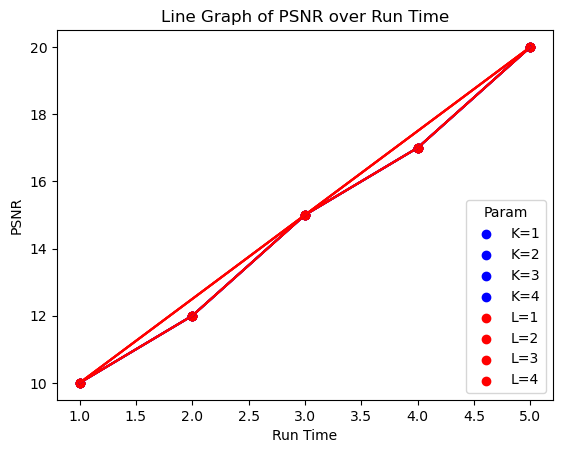

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
df_temp = pd.DataFrame({'Run Time': [1, 2, 3, 4, 5]*4,
                        'PSNR': [10, 12, 15, 17, 20]*4,
                        'param: K': [1]*5 + [2]*5 + [3]*5 + [4]*5,
                        'param: L': [1, 2, 3, 4]*5})

# separate the data by param: K
fig, ax = plt.subplots()
for k, grp in df_temp.groupby('param: K'):
    ax.scatter(x='Run Time', y='PSNR', data=grp, label=f'K={k}', color='blue')
    ax.plot(grp['Run Time'], grp['PSNR'], color='blue')

# separate the data by param: L
for l, grp in df_temp.groupby('param: L'):
    ax.scatter(x='Run Time', y='PSNR', data=grp, label=f'L={l}', color='red')
    ax.plot(grp['Run Time'], grp['PSNR'], color='red')

# add legend and labels
plt.legend(title='Param', loc='lower right')
plt.xlabel('Run Time')
plt.ylabel('PSNR')
plt.title('Line Graph of PSNR over Run Time')
plt.show()


In [217]:
attempt = 5
def new_test_process(test_name, N=300, K=100, I=5, L=4, P=8, save_dic = False, generate_graph = False, variabel = None):
    print(f"Test: {test_name}")
    print(f"Params: N = {N}, K = {K}, I = {I}, L = {L}, P = {P}")

    patch_shape = np.array([P, P])

    sam = Sampler(paths=paths, patch_shape=patch_shape, num_samples=N)
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo='OMP')

    # Start the timer
    start_time = time.time()

    D = learner.sparse_dictionary_learning(iters=I, output=True)

    (recon, error) = learner.SPIR(path=path, percent=percent, min_count=min_count)

    # Calculate the run time
    run_time = time.time() - start_time

    # Save the reconstruction
    correct_path = 'Reconstructed Images/' + test_name + 'N' + str(N) + 'K' + str(K) + 'I' + str(I) + 'L' + str(L) + 'P' + str(P) + '.jpg'
    cv2.imwrite(correct_path, recon)

    # Print the results
    print(f"Error = {error}, Run Time = {run_time}")

    # Save the results
    #data[(N, K, I, L, P)] = [error, run_time]

    with open('Graphs/' + test_name + '_data.pkl', 'rb') as f:
        data = pickle.load(f)

    data[(N, K, I, L, P)] = [error, run_time]

    with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
        pickle.dump(data, f)

    if save_dic:

        with open('Graphs/' + test_name + '_dictionaries.pkl', 'rb') as f:
            dictionaries = pickle.load(f)

        dictionaries[(N, K, I, L, P)] = D

        with open('Graphs/' + test_name + '_dictionaries.pkl', 'wb') as f:
            pickle.dump(data, f)

    if generate_graph:
        xs =[x[variabel] for x in list(data.keys())]
        es = [y[0] for y in list(data.values())]
        ts = [y[1] for y in list(data.values())]


        # create the figure and first axis
        fig, ax1 = plt.subplots(figsize=(8, 6))

        # create the first line and first y-axis
        ax1.plot(xs, es, linestyle='-.', marker='s', color='blue', label='Error Est.')

        X_label = ['N', 'K', 'I', 'L', 'P']
        X_label = X_label[variabel]
        ax1.set_xlabel(X_label + ' Value')

        ax1.set_ylabel('Error Est.')
        ax2 = ax1.twinx()

        ax2.plot(xs, ts, linestyle='--', marker='^', color='green', label = 'Run Time')

        # rotate and adjust second y-axis label
        ax2.yaxis.set_label_coords(1.1, 0.5)
        ax2.set_ylabel('Run Time', rotation=-90, labelpad=10)

        ax1.set_title('Run Time and Error Est. with varying ' + X_label + ' values')

        # combine legends from both axes
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

        # save the graph as a PNG file
        plt.savefig('Graphs/' + test_name + '.png')

        plt.show()




Test: test_test
Params: N = 66, K = 65, I = 0, L = 1, P = 8


0it [00:00, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


Error = 8.538154297801935, Run Time = 8.990474700927734


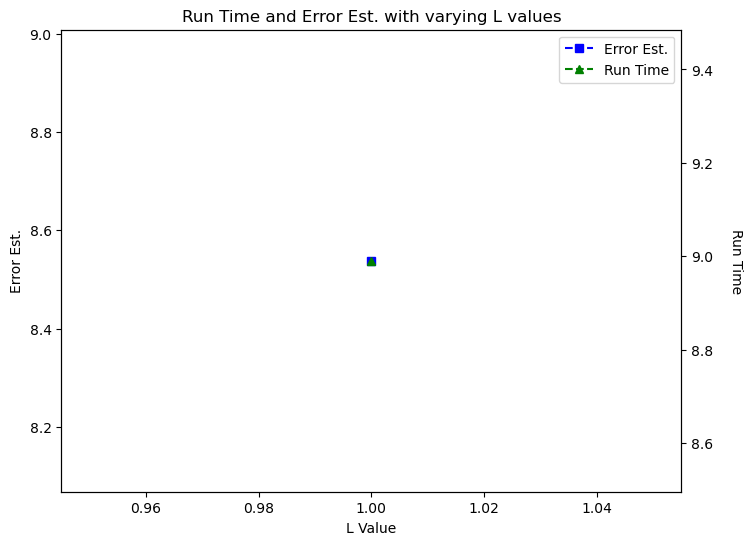

In [213]:
with open('Graphs/' + 'test_test' + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

new_test_process('test_test', N=66,K=65, I=0, L=1, P=8, generate_graph=True, variabel=3 )

Test: octopus_test_I
Params: N = 300, K = 100, I = 0, L = 4, P = 8


0it [00:00, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.386954082352172, Run Time = 57.23937153816223
Test: octopus_test_I
Params: N = 300, K = 100, I = 1, L = 4, P = 8


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.256990246702133, Run Time = 59.73774218559265


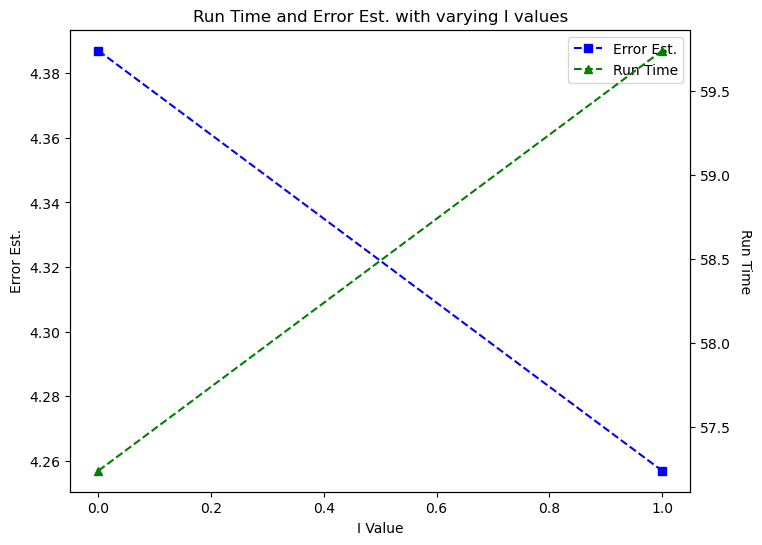

In [214]:
test_name = 'tea_egg_I'
variable = 2
with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for I in [0]:
    new_test_process(test_name, I=I, generate_graph=False, variabel=variable)
new_test_process(test_name, I=1, generate_graph=True, variabel=variable)

In [223]:
with open('Graphs/tea_egg_test_K_data.pkl', 'rb') as f:
    dataK = pickle.load(f)
with open('Graphs/tea_egg_test_I_data.pkl', 'rb') as f:
    dataI = pickle.load(f)
with open('Graphs/tea_egg_test_L_data.pkl', 'rb') as f:
    dataL = pickle.load(f)
with open('Graphs/tea_egg_test_N_data.pkl', 'rb') as f:
    dataN = pickle.load(f)
with open('Graphs/tea_egg_test_P_data.pkl', 'rb') as f:
    dataP = pickle.load(f)

{(300, 65, 5, 4, 8): [4.337268666486559, 45.985373973846436],
 (300, 100, 5, 4, 8): [4.1505694681600245, 70.60204029083252],
 (300, 200, 5, 4, 8): [3.765750575665474, 158.2105782032013],
 (300, 299, 5, 4, 8): [3.625186769972754, 240.72120547294617]}

Path = Compressed Images/tea_eggs.jpg
Paths = ['Compressed Images/cheese_board.jpg', 'Compressed Images/chicken_n_beans.jpg', 'Compressed Images/persimmon_tomato_salad.jpg', 'Compressed Images/octopus.jpg']
Test Group: tea_eggg_test
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 0, L = 4, P = 8


0it [00:00, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.512078507461398, Run Time = 58.07973313331604
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 1, L = 4, P = 8


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.274938027628393, Run Time = 58.9829843044281
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 2, L = 4, P = 8


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.151866649082089, Run Time = 61.91838836669922
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.043949596537758, Run Time = 70.5125744342804
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 10, L = 4, P = 8


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.126858787063859, Run Time = 84.6235842704773
Test: tea_egg_test_I
Params: N = 300, K = 100, I = 20, L = 4, P = 8


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.02937463603349, Run Time = 113.09310483932495


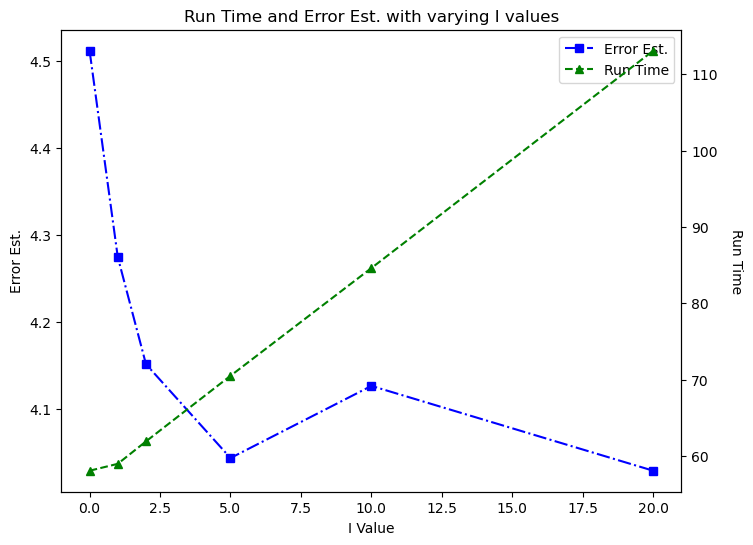

Test: tea_egg_test_K
Params: N = 300, K = 65, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.337268666486559, Run Time = 45.985373973846436
Test: tea_egg_test_K
Params: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.1505694681600245, Run Time = 70.60204029083252
Test: tea_egg_test_K
Params: N = 300, K = 200, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 3.765750575665474, Run Time = 158.2105782032013
Test: tea_egg_test_K
Params: N = 300, K = 299, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 3.7022205111537896, Run Time = 237.56400442123413
Test: tea_egg_test_K
Params: N = 300, K = 299, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 3.625186769972754, Run Time = 240.72120547294617


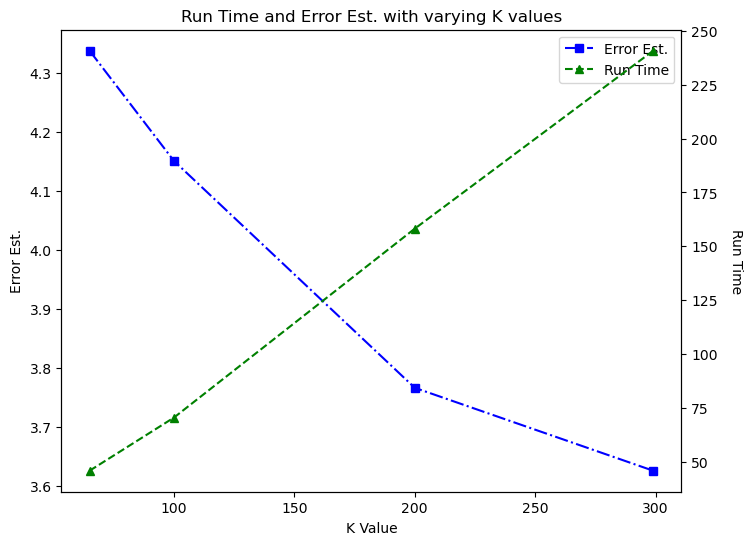

Test: tea_egg_test_P
Params: N = 300, K = 100, I = 5, L = 4, P = 4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5791 [00:00<?, ?it/s]

Error = 1.6619147351789902, Run Time = 71.54284071922302
Test: tea_egg_test_P
Params: N = 300, K = 100, I = 5, L = 4, P = 6


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5655 [00:00<?, ?it/s]

Error = 2.97053053513705, Run Time = 71.36009764671326
Test: tea_egg_test_P
Params: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.0802998157975825, Run Time = 70.55470037460327
Test: tea_egg_test_P
Params: N = 300, K = 100, I = 5, L = 4, P = 10


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5386 [00:00<?, ?it/s]

Error = 5.214890570642349, Run Time = 103.44000458717346
Test: tea_egg_test_P
Params: N = 300, K = 100, I = 5, L = 4, P = 12


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5254 [00:00<?, ?it/s]

Error = 6.30056045272353, Run Time = 103.21885228157043


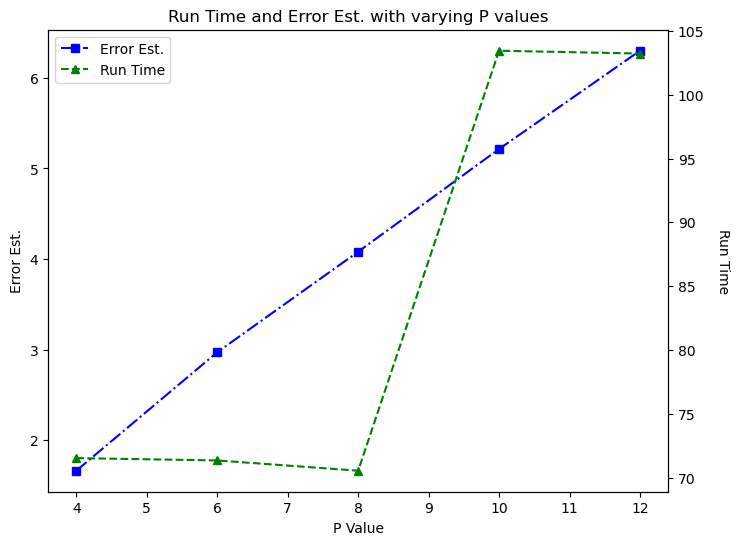

Test: tea_egg_test_N
Params: N = 101, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.53186254478338, Run Time = 59.9076030254364
Test: tea_egg_test_N
Params: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.098203430613696, Run Time = 70.91009950637817
Test: tea_egg_test_N
Params: N = 900, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 3.839446132705436, Run Time = 104.56032109260559


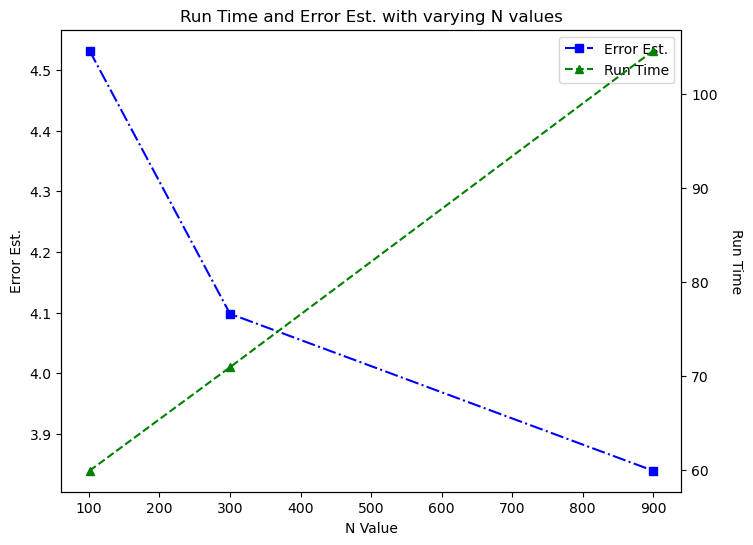

Test: tea_egg_test_L
Params: N = 300, K = 100, I = 5, L = 1, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 7.799349546251202, Run Time = 16.16649341583252
Test: tea_egg_test_L
Params: N = 300, K = 100, I = 5, L = 2, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 5.906810931194251, Run Time = 33.6622416973114
Test: tea_egg_test_L
Params: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 4.118961550085601, Run Time = 71.95655751228333
Test: tea_egg_test_L
Params: N = 300, K = 100, I = 5, L = 8, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Error = 2.671010297848502, Run Time = 160.20327639579773


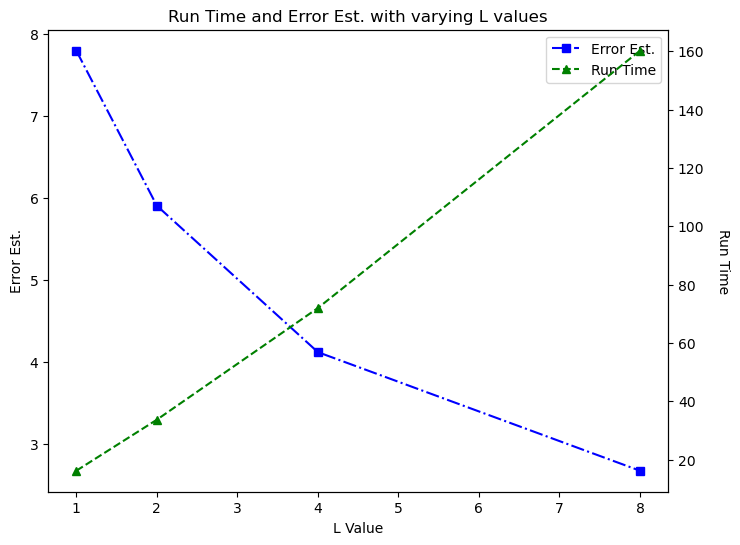

In [221]:
variables = ['N', 'K', 'I', 'L', 'P']

print(f"Path = {path}")
print(f"Paths = {paths}")
print(f"Test Group: tea_eggg_test")

test_name = 'tea_egg_test_I'
variable = 2
with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for I in [0,1,2,5,10]:
    new_test_process(test_name, I=I, generate_graph=False, variabel=variable)
new_test_process(test_name, I=20, generate_graph=True, variabel=variable)

test_name = 'tea_egg_test_K'
variable = 1

with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for K in [65, 100, 200, 299]:
    new_test_process(test_name, K=K, generate_graph=False, variabel=variable)
new_test_process(test_name, K=299, generate_graph=True, variabel=variable)

test_name = 'tea_egg_test_P'
variable = 4

with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for P in [4,6, 8, 10]:
    new_test_process(test_name, P=P, generate_graph=False, variabel=variable)
new_test_process(test_name, P = 12, generate_graph=True, variabel=variable)

test_name = 'tea_egg_test_N'
variable = 0

with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for N in [101, 300]:
    new_test_process(test_name, N=N, generate_graph=False, variabel=variable)
new_test_process(test_name, N = 900, generate_graph=True, variabel=variable)


test_name = 'tea_egg_test_L'
variable = 3

with open('Graphs/' + test_name + '_data.pkl', 'wb') as f:
    pickle.dump({}, f)

for L in [1,2,4]:
    new_test_process(test_name, L=L, generate_graph=False, variabel=variable)
new_test_process(test_name, L = 8, generate_graph=True, variabel=variable)

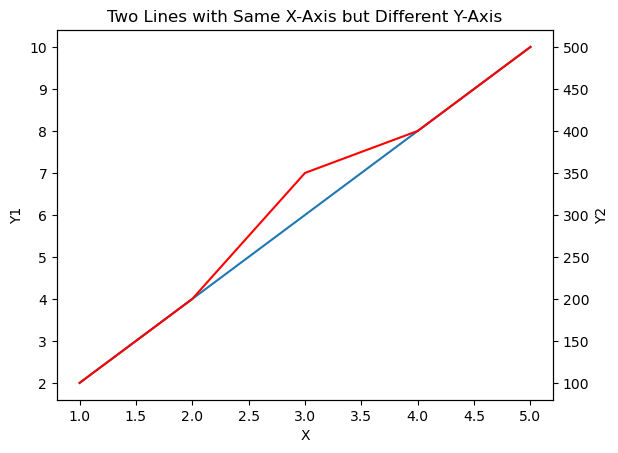

In [178]:
import matplotlib.pyplot as plt

# define x and y values for the two lines
xs = [1, 2, 3, 4, 5]
ys1 = [2, 4, 6, 8, 10]
ys2 = [100, 200, 350, 400, 500]

# create the figure and first axis
fig, ax1 = plt.subplots()

# create the first line and first y-axis
ax1.plot(xs, ys1, label='Line 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1')

# create the second axis and second line
ax2 = ax1.twinx()
ax2.plot(xs, ys2, label='Line 2', color='r')
ax2.set_ylabel('Y2')

# add a title and legend to the graph
ax1.set_title('Two Lines with Same X-Axis but Different Y-Axis')
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper left')
# save the graph as a PNG file
#plt.savefig('line_graph.png')

# display the graph
plt.show()


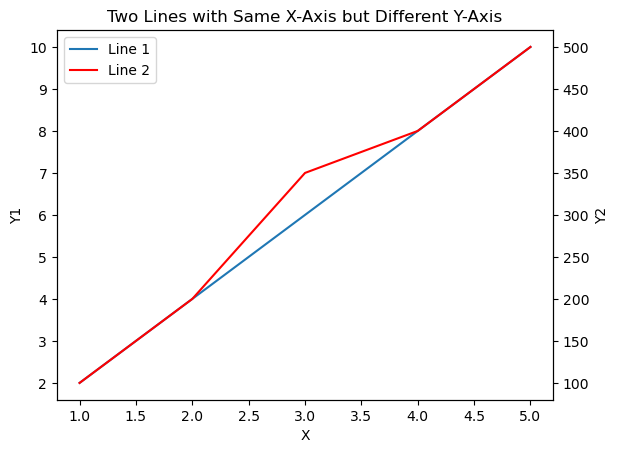

In [180]:
import matplotlib.pyplot as plt

# define x and y values for the two lines
xs = [1, 2, 3, 4, 5]
ys1 = [2, 4, 6, 8, 10]
ys2 = [100, 200, 350, 400, 500]

# create the figure and first axis
fig, ax1 = plt.subplots()

# create the first line and first y-axis
line1 = ax1.plot(xs, ys1, label='Line 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1')

# create the second axis and second line
ax2 = ax1.twinx()
line2 = ax2.plot(xs, ys2, label='Line 2', color='r')
ax2.set_ylabel('Y2')

# combine the lines and labels from both axes
lines = line1 + line2
labels = [line.get_label() for line in lines]

# add a title and legend to the graph
ax1.set_title('Two Lines with Same X-Axis but Different Y-Axis')
ax1.legend(lines, labels, loc='upper left')

# save the graph as a PNG file
#plt.savefig('line_graph.png')

# display the graph
plt.show()


In [104]:
for I in [0,1,2,5,10,20]:
    test_process(I=I)

for K in [65, 100, 200, 299]:
    test_process(K=K)

for P in [4,6, 8, 10, 12]:
    test_process(P=P)

0it [00:00, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5791 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5655 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5386 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5254 [00:00<?, ?it/s]

In [110]:
for N in [101, 300, 900]:
    test_process(N=N)

for L in [1,2,4,8]:
    test_process(L=L)

Testing: N = 101, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 300, K = 100, I = 5, L = 4, P = 8


C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 900, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 300, K = 100, I = 5, L = 1, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 300, K = 100, I = 5, L = 2, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 300, K = 100, I = 5, L = 4, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

Testing: N = 300, K = 100, I = 5, L = 8, P = 8


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

In [111]:
ts1 = [52, 2+18*60+17, 5+17*60+16, 13+51, 27+1*60+49, 55+12*60+43]
ts2 = [8+11*60+48, 13+53, 29+2*60+45, 42 + 3*60+11 ]
ts3 = [13+3*60+24, 13+50, 13+1*60+10, 19 + 1*60+46, 23+1*60+33]

In [2]:
2+2

4

In [114]:
with open('Graphs/tea_eggs_data_attempt1.pkl', 'rb') as f:
    x = pickle.load(f)
x.keys()

dict_keys([(66, 65, 0, 1, 8), (66, 65, 1, 1, 8)])

In [115]:
with open('Graphs/tea_eggs_data_attempt2.pkl', 'rb') as f:
    x = pickle.load(f)
x.keys()

dict_keys([(66, 65, 0, 1, 8), (66, 65, 1, 1, 8), (300, 100, 0, 4, 8), (300, 100, 1, 4, 8), (300, 100, 2, 4, 8), (300, 100, 5, 4, 8), (300, 100, 10, 4, 8), (300, 100, 20, 4, 8), (300, 65, 5, 4, 8), (300, 200, 5, 4, 8), (300, 299, 5, 4, 8), (300, 100, 5, 4, 4), (300, 100, 5, 4, 6), (300, 100, 5, 4, 10), (300, 100, 5, 4, 12)])

In [150]:
with open('Graphs/tea_eggs_data_attempt4.pkl', 'rb') as f:
    x = pickle.load(f)
[(key, val[1][1], val[1][2]) for key, val in list(x.items())[3:]]

IndexError: list index out of range

In [154]:
with open('Graphs/tea_eggs_data_attempt2.pkl', 'rb') as f:
    x = pickle.load(f)
x.keys()

dict_keys([(66, 65, 0, 1, 8), (66, 65, 1, 1, 8), (300, 100, 0, 4, 8), (300, 100, 1, 4, 8), (300, 100, 2, 4, 8), (300, 100, 5, 4, 8), (300, 100, 10, 4, 8), (300, 100, 20, 4, 8), (300, 65, 5, 4, 8), (300, 200, 5, 4, 8), (300, 299, 5, 4, 8), (300, 100, 5, 4, 4), (300, 100, 5, 4, 6), (300, 100, 5, 4, 10), (300, 100, 5, 4, 12)])

In [169]:
list(x.values())[0][0]

array([[0.15663014, 0.10891326, 0.06782937, ..., 0.13906705, 0.12377225,
        0.19277678],
       [0.16433326, 0.09171643, 0.06156819, ..., 0.13414432, 0.12302663,
        0.1981317 ],
       [0.15021087, 0.11894475, 0.07409054, ..., 0.13168296, 0.12302663,
        0.19679297],
       ...,
       [0.12068224, 0.2565194 , 0.18679164, ..., 0.11199205, 0.12451787,
        0.00803237],
       [0.11811453, 0.26941702, 0.18679164, ..., 0.11445341, 0.12377225,
        0.00937109],
       [0.11554683, 0.26655088, 0.18574811, ..., 0.11445341, 0.12377225,
        0.01070982]])

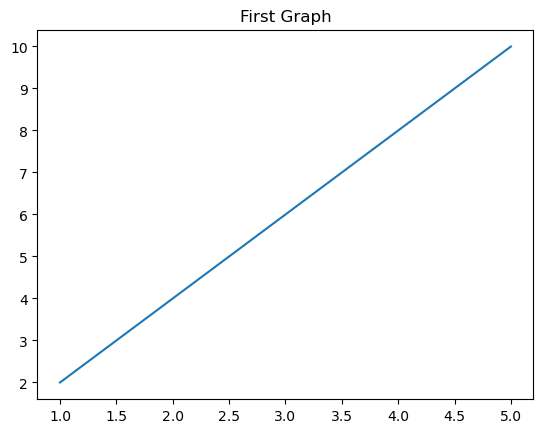

  0%|          | 0/5 [00:00<?, ?it/s]

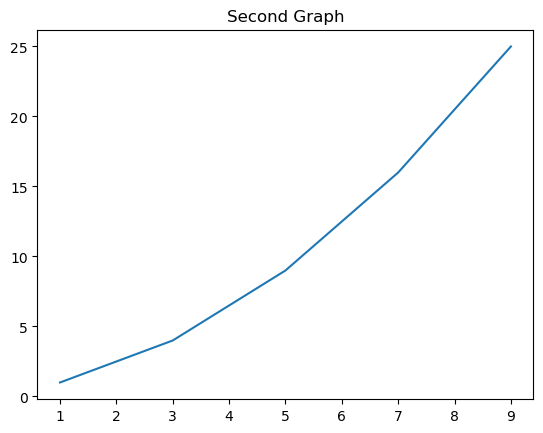

In [171]:
import matplotlib.pyplot as plt
import time

# create the first graph
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)
plt.title('First Graph')
plt.show()

# wait for 5 seconds
for i in tqdm(range(5)):
    time.sleep(1)


# create the second graph
x = [1, 3, 5, 7, 9]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.title('Second Graph')
plt.show()


In [153]:
import matplotlib.pyplot as plt

# Sample dictionary with keys dict_keys([...])
with open('Graphs/tea_eggs_data_attempt2.pkl', 'rb') as f:
    x = pickle.load(f)
data = x

# Extract the desired values from the dictionary
x_values = []
y_values = []
for key, value in data.items():
    if key[0:2] == (300, 100) and key[3:] == (4, 8):
        x_values.append(key[2])
        y_values.append(value[1])

# Plot the data
plt.plot(x_values, y_values, 'bo-')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Plot of (300, 100, _, 4, 8) values')
plt.show()

IndexError: list index out of range

In [ ]:


#Ns = [186, 256, 512, 1042]
Ns = [512, 1842]
octopus_errors = {}
for N in Ns:
    octopus_errors[N] = []
    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

    dictionaries = []
    #Ls = [1, 2, 4, 8, 16]
    Ls = [2,4,8]
    for L in Ls:
        learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
        D = learner.sparse_dictionary_learning(iters = I, output = True)
        (recon, error) =  learner.SPIR(path = path, percent=percent, min_count=min_count)
        dictionaries.append((L, N, D, error))
        correct_path = new_path + 'N' + str(N) + 'L' + str(L) + '.jpg'
        cv2.imwrite(correct_path, recon)

        octopus_errors[N].append(error)

    with open('Graphs/octopusN' + str(N) + '.pkl', 'wb') as f:
        pickle.dump(dictionaries, f)


In [87]:
dic = {}


In [88]:
dic[(1,2,4)] = []

In [89]:
dic

{(1, 2, 4): []}

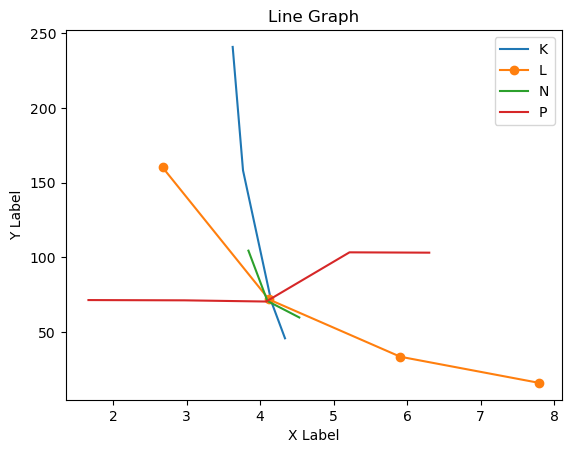

In [229]:
import matplotlib.pyplot as plt

# Load the data from the pickle files
with open('Graphs/tea_egg_test_K_data.pkl', 'rb') as f:
    dataK = pickle.load(f)
with open('Graphs/tea_egg_test_I_data.pkl', 'rb') as f:
    dataI = pickle.load(f)
with open('Graphs/tea_egg_test_L_data.pkl', 'rb') as f:
    dataL = pickle.load(f)
with open('Graphs/tea_egg_test_N_data.pkl', 'rb') as f:
    dataN = pickle.load(f)
with open('Graphs/tea_egg_test_P_data.pkl', 'rb') as f:
    dataP = pickle.load(f)

# Extract the x and y values from each data dictionary
xK, yK = zip(*dataK.values())
xI, yI = zip(*dataI.values())
xL, yL = zip(*dataL.values())
xN, yN = zip(*dataN.values())
xP, yP = zip(*dataP.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the lines
ax.plot(xK, yK, label='K')
#ax.plot(xI, yI, label='I')
ax.plot(xL, yL, marker = 'o', label='L')
ax.plot(xN, yN, label='N')
ax.plot(xP, yP, label='P')

# Add a legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Line Graph')

# Display the graph
plt.show()


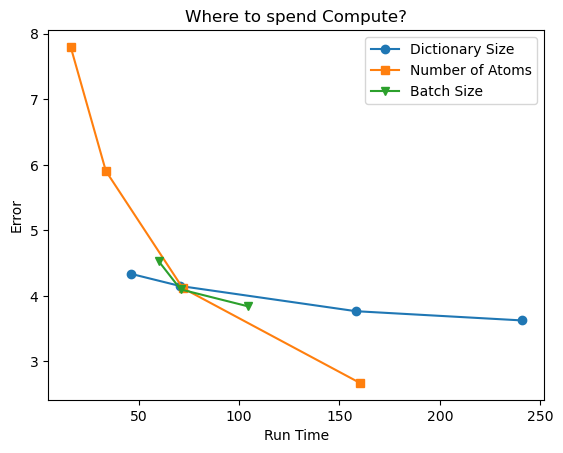

In [240]:
import matplotlib.pyplot as plt

# Load the data from the pickle files
with open('Graphs/tea_egg_test_K_data.pkl', 'rb') as f:
    dataK = pickle.load(f)
with open('Graphs/tea_egg_test_I_data.pkl', 'rb') as f:
    dataI = pickle.load(f)
with open('Graphs/tea_egg_test_L_data.pkl', 'rb') as f:
    dataL = pickle.load(f)
with open('Graphs/tea_egg_test_N_data.pkl', 'rb') as f:
    dataN = pickle.load(f)
with open('Graphs/tea_egg_test_P_data.pkl', 'rb') as f:
    dataP = pickle.load(f)

# Extract the x and y values from each data dictionary
yK, xK = zip(*dataK.values())
yI, xI = zip(*dataI.values())
yL, xL = zip(*dataL.values())
yN, xN = zip(*dataN.values())
yP, xP = zip(*dataP.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the lines
ax.plot(xK, yK, marker = 'o', label='Dictionary Size')
#ax.plot(xI, yI, label='I')
ax.plot(xL, yL, marker = 's',label='Number of Atoms')
ax.plot(xN, yN, marker = 'v',label='Batch Size')
#ax.plot(xP, yP, label='P')

# Add a legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Run Time')
ax.set_ylabel('Error')
ax.set_title('Where to spend Compute?')

plt.savefig('where_spend_compute.png')
# Display the graph
plt.show()


In [232]:
dataP

{(300, 100, 5, 4, 4): [1.6619147351789902, 71.54284071922302],
 (300, 100, 5, 4, 6): [2.97053053513705, 71.36009764671326],
 (300, 100, 5, 4, 8): [4.0802998157975825, 70.55470037460327],
 (300, 100, 5, 4, 10): [5.214890570642349, 103.44000458717346],
 (300, 100, 5, 4, 12): [6.30056045272353, 103.21885228157043]}

![Graph](where_spend_compute.png)